In [1]:
import torch
import numpy as np
from torch import nn
import random
import math
import matplotlib.pyplot as plt

from model import BG

In [16]:
import json
data = json.loads(open("datasets/dataset5.json").read())
X_train = np.array(data["X"]).astype(np.double)
Y_train = np.array(data["Y"]).astype(np.double)
len(data["X"])

376

In [3]:
model = BG()

guess: tensor([0.9881, 0.0111], grad_fn=<SigmoidBackward0>), target: tensor([1, 0])
guess: tensor([0.9881, 0.0111], grad_fn=<SigmoidBackward0>), target: tensor([1, 0])
guess: tensor([0.9552, 0.0427], grad_fn=<SigmoidBackward0>), target: tensor([1, 0])
guess: tensor([0.6782, 0.3199], grad_fn=<SigmoidBackward0>), target: tensor([1, 0])
guess: tensor([0.0011, 0.9990], grad_fn=<SigmoidBackward0>), target: tensor([0, 1])
guess: tensor([0.0055, 0.9950], grad_fn=<SigmoidBackward0>), target: tensor([0, 1])
guess: tensor([0.0268, 0.9750], grad_fn=<SigmoidBackward0>), target: tensor([0, 1])
guess: tensor([0.9881, 0.0110], grad_fn=<SigmoidBackward0>), target: tensor([1, 0])
guess: tensor([0.9881, 0.0110], grad_fn=<SigmoidBackward0>), target: tensor([1, 0])
guess: tensor([0.2044, 0.8003], grad_fn=<SigmoidBackward0>), target: tensor([1, 0])
guess: tensor([0.9866, 0.0124], grad_fn=<SigmoidBackward0>), target: tensor([1, 0])
guess: tensor([0.9881, 0.0110], grad_fn=<SigmoidBackward0>), target: tensor(

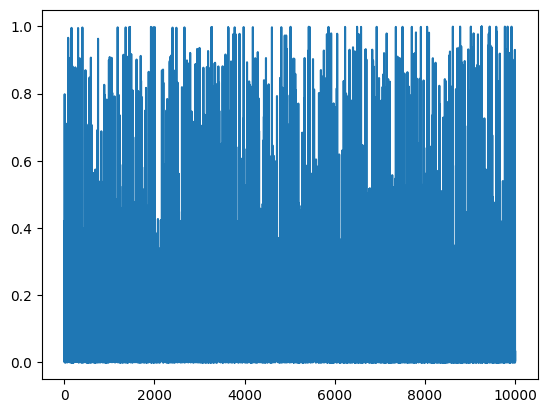

In [17]:
loss_function = nn.L1Loss()
optim = torch.optim.Adam(model.parameters(), lr=0.001)
loses = []
for i in range(10000):
    samp = math.floor(random.random()*len(X_train))
    input = torch.tensor(X_train[samp]).float()
    target = torch.tensor(Y_train[samp]).long()
    optim.zero_grad()
    guess = model(input)
    print(f"guess: {guess}, target: {target}")
    loss = loss_function(guess, target)
    loss.backward()
    optim.step()
    loses.append(loss.item())
plt.plot(loses)

In [19]:
# test
color = torch.tensor(np.array([27/255, 242/255, 84/255])).float()
model(color)


tensor([0.0217, 0.9794], grad_fn=<SigmoidBackward0>)

In [6]:
torch.save(model.state_dict(), "models/color_3.pt")